In [70]:
#imports - most of these are not used
#purpose is to determine which circRNAs will be used for machine learning models
from scipy.stats.stats import pearsonr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D 
circ = pd.read_csv("/Users/kbhaskar/Desktop/GEO database/transposedDataComplete copy.csv", index_col=0)
circ2 = pd.read_csv("/Users/kbhaskar/Desktop/GEO database/significantCircsDraft1 copy.csv", index_col=0)
print("done")

done


In [106]:
circ.head()

,Tumor,ASCRP3000002,ASCRP3000003,ASCRP3000004,ASCRP3000005,ASCRP3000006,ASCRP3000007,ASCRP3000009,ASCRP3000010,ASCRP3000012,...,ASCRP3013596,ASCRP3013597,ASCRP3013599,ASCRP3013601,ASCRP3013605,ASCRP3013608,ASCRP3013609,ASCRP3013614,ASCRP3013615,ASCRP3013617
ID_REF,,,,,,,,,,,,,,,,,,,,,
GSM4716745,0,9.347199,5.601917,5.859084,5.221597,4.714993,7.020277,5.652909,4.874262,5.221597,...,6.755378,4.477588,10.471296,7.242476,4.793425,4.639910,5.054196,4.477588,4.580978,6.130916
GSM4716746,1,7.924066,5.702301,6.790143,4.778810,4.923507,8.053487,4.850227,6.432529,5.042887,...,5.791409,4.778810,8.762197,7.524066,5.465340,5.226807,5.119417,4.959738,5.058748,5.408742
GSM4716747,0,7.693551,5.641396,7.373511,5.235634,4.786123,6.894172,4.928253,5.796675,5.297991,...,5.337409,5.068240,8.586462,6.870047,5.857592,5.751532,4.859180,4.808409,4.733790,5.388744
GSM4716748,1,7.848023,5.916043,8.674207,5.846102,5.261615,9.266176,4.837186,5.338034,5.102845,...,5.404494,4.837186,9.013767,7.381298,5.746838,6.637338,4.691209,4.978492,4.932747,5.693895
GSM4716749,0,7.224959,5.877790,7.856203,5.159408,5.291380,9.142552,4.938640,5.137871,5.837171,...,5.558348,4.529109,8.169946,7.255588,6.216634,5.806116,5.054956,4.645935,4.786646,5.777538


In [107]:
#virtually no constant features
X = circ.copy()
X.drop(labels=['Tumor'], axis=1, inplace = True)
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X)
sum(sel.get_support())

10592

In [108]:
#non - quasi constant features for 98% of observations - can be ignored
sel = VarianceThreshold(threshold=0.02)
sel.fit(X)  
sum(sel.get_support())

10591

In [109]:
from pandas import *
import numpy as np
from scipy.stats.stats import pearsonr
import itertools
correlations = {}
alls =[]
bestPos = []
bestNeg = []
columns = circ.columns.tolist()
#Find out which circRNAs are most correlated with tumor occurence using pearsonr correlation. For the machine learning model, the filters are less restrictive. 
for col_a, col_b in itertools.combinations(columns, 2):
    if col_a == 'Tumor':
        r,p = pearsonr(circ.loc[:, col_a], circ.loc[:, col_b])
        correlations[col_a + '__' + col_b] = pearsonr(circ.loc[:, col_a], circ.loc[:, col_b])
        #differentiate between positively correlated with tumor and negatively correlated - neg or pos pearsonr val
        if r > 0.68 and p < 0.05:
            bestPos.append(str(col_b))
            alls.append(str(col_b))
        elif r < -0.68 and p <0.05:
            bestNeg.append(str(col_b))
            alls.append(str(col_b))
    

result = DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']
print(result.sort_index(ascending=False))

                          PCC       p-value
Tumor__ASCRP3013617 -0.238975  1.779655e-02
Tumor__ASCRP3013615  0.222980  2.731900e-02
Tumor__ASCRP3013614 -0.156116  1.247681e-01
Tumor__ASCRP3013609 -0.056140  5.829646e-01
Tumor__ASCRP3013608  0.511790  7.204089e-08
...                       ...           ...
Tumor__ASCRP3000006  0.349700  4.162483e-04
Tumor__ASCRP3000005  0.336392  7.075264e-04
Tumor__ASCRP3000004  0.091366  3.709224e-01
Tumor__ASCRP3000003 -0.142747  1.608602e-01
Tumor__ASCRP3000002 -0.194506  5.496149e-02

[10592 rows x 2 columns]


In [110]:
#these are the main circRNAs that will be used for further investigation. For machine learning, more circs were used
print(len(bestPos))
print(len(bestNeg))
print(bestPos)
print("")
print("")
print("")
print("")
print(bestNeg)

4
8
['ASCRP3001251', 'ASCRP3006821', 'ASCRP3008985', 'ASCRP3009102']




['ASCRP3000013', 'ASCRP3000155', 'ASCRP3001458', 'ASCRP3004690', 'ASCRP3005209', 'ASCRP3006726', 'ASCRP3007627', 'ASCRP3011276']


In [111]:
print(len(alls))

12


In [112]:
#information gain 
y = circ['Tumor']
from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(X,y)
mi_score_selected_index = np.where(mi_score >0.45)[0]


In [113]:
#information gain vaildated one of the circRNAs from correlation
print(X.columns[mi_score_selected_index])

Index(['ASCRP3001458'], dtype='object')


In [53]:
result.to_csv('significantCorrelations.csv')#csv for further investigation

In [115]:
from scipy.optimize import curve_fit
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

p0 = [max(circ['Tumor'
]), np.median(circ['ASCRP3001458']),1,min(circ['Tumor'
])]

popt, pcov = curve_fit(sigmoid, circ['ASCRP3001458'], circ['Tumor'
],p0, method='dogbox')

(-0.1, 1.1)

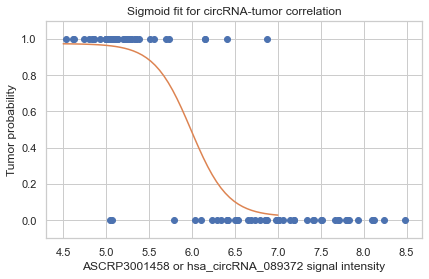

In [116]:
x = np.linspace(4.5, 7, 50)
y = sigmoid(x, *popt)

plt.title("Sigmoid fit for circRNA-tumor correlation")
plt.xlabel("ASCRP3001458 or hsa_circRNA_089372 signal intensity")
plt.ylabel("Tumor probability")
plt.plot(circ['ASCRP3001458'], circ['Tumor'
], 'o')

colors = {'D':'tab:blue', 'E':'tab:orange', 'F':'tab:green', 'G':'tab:red', 'H':'tab:purple', 'I':'tab:brown', 'J':'tab:pink'}

ax.scatter(df['carat'], df['price'], c=df['color'].map(colors))

handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.plot(x,y)
plt.ylim(-0.1, 1.1)


Text(0, 0.5, 'Tumor probability')

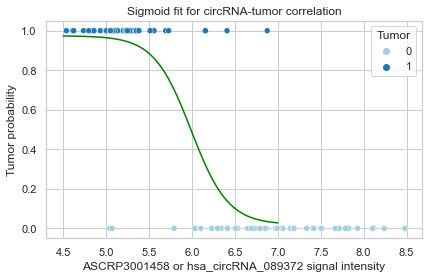

In [157]:

sns.scatterplot(x='ASCRP3001458', y='Tumor', data=circ, hue='Tumor', palette = 'Paired')
plt.plot(x,y, color = 'green')
plt.title("Sigmoid fit for circRNA-tumor correlation")
plt.xlabel("ASCRP3001458 or hsa_circRNA_089372 signal intensity")
plt.ylabel("Tumor probability")

Text(0, 0.5, 'Tumor probability')

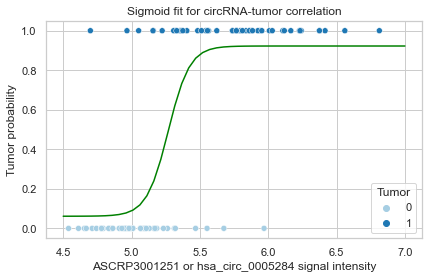

In [158]:

p0 = [max(circ['Tumor'
]), np.median(circ['ASCRP3001251']),1,min(circ['Tumor'
])]

popt, pcov = curve_fit(sigmoid, circ['ASCRP3001251'], circ['Tumor'
],p0, method='dogbox')
x = np.linspace(4.5, 7, 50)
y = sigmoid(x, *popt)
sns.color_palette("rocket", as_cmap=True)
sns.scatterplot(x='ASCRP3001251', y='Tumor', data=circ, hue='Tumor', palette = 'Paired')
plt.plot(x,y, color = 'green')
plt.title("Sigmoid fit for circRNA-tumor correlation")
plt.xlabel("ASCRP3001251 or hsa_circ_0005284 signal intensity")
plt.ylabel("Tumor probability")

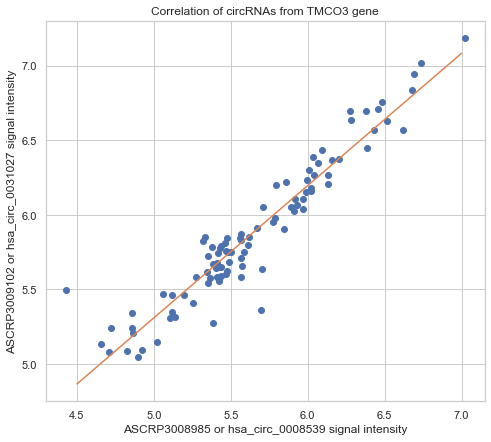

In [167]:
xi = circ['ASCRP3008985']
yi = circ['ASCRP3009102']
m, b = np.polyfit(xi, yi, 1)
plt.figure(figsize=(7,7))

plt.title("Correlation of circRNAs from TMCO3 gene")
plt.xlabel("ASCRP3008985 or hsa_circ_0008539 signal intensity")
plt.ylabel("ASCRP3009102 or hsa_circ_0031027 signal intensity")
plt.plot(xi, yi, 'o');
plt.plot(x, m*x + b)

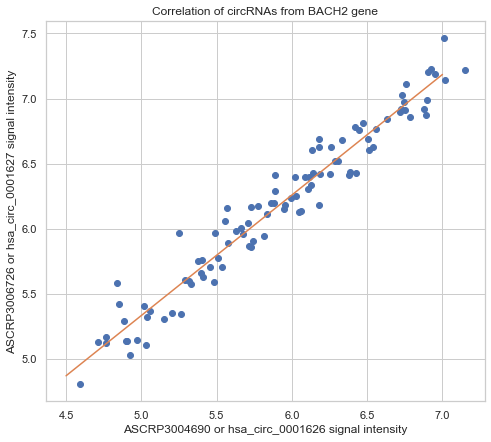

In [170]:
xi = circ['ASCRP3004690']
yi = circ['ASCRP3006726']
m, b = np.polyfit(xi, yi, 1)
plt.figure(figsize=(7,7))
plt.title("Correlation of circRNAs from BACH2 gene")
plt.xlabel("ASCRP3004690 or hsa_circ_0001626 signal intensity")
plt.ylabel("ASCRP3006726 or hsa_circ_0001627 signal intensity")
plt.plot(xi, yi, 'o');
plt.plot(x, m*x + b)

In [26]:
circ2 = pd.DataFrame()
for (columnName, columnData) in circ.iteritems():
    if columnName in alls:
        circ2[columnName] = columnData

In [27]:
theList = list(circ['Tumor'])
circ2.insert(0, "Tumor", theList, True)

In [28]:
circ2.head()

,Tumor,ASCRP3000013,ASCRP3000155,ASCRP3001251,ASCRP3001458,ASCRP3004690,ASCRP3005209,ASCRP3006726,ASCRP3006821,ASCRP3007627,ASCRP3008985,ASCRP3009102,ASCRP3011276
ID_REF,,,,,,,,,,,,,
GSM4716745,0,6.918616,6.570148,4.793425,6.229621,6.130916,6.755378,6.605690,4.793425,7.538901,5.696123,5.364268,6.892867
GSM4716746,1,5.394929,5.119417,5.323065,6.151560,5.835151,5.518229,6.116537,6.408359,7.323408,5.616325,5.855476,5.946130
GSM4716747,0,5.656489,5.707211,4.711968,6.976011,6.894172,6.843566,6.989216,6.108404,10.084522,5.565447,5.871828,6.525039
GSM4716748,1,4.885511,4.837186,5.404494,5.338034,4.837186,5.404494,5.584661,6.794016,8.349676,6.378238,6.698555,4.643916
GSM4716749,0,6.525900,6.496562,4.969787,6.407637,6.536702,6.940158,6.628252,5.910117,10.949031,4.718528,5.238497,6.245824


In [29]:
#these are the circs that will be used for the machine learning model - only the 2 strongest from above were selected for further investigation after machine learning was done
circ2.corr()

,Tumor,ASCRP3000013,ASCRP3000155,ASCRP3001251,ASCRP3001458,ASCRP3004690,ASCRP3005209,ASCRP3006726,ASCRP3006821,ASCRP3007627,ASCRP3008985,ASCRP3009102,ASCRP3011276
Tumor,1.000000,-0.712470,-0.726942,0.712221,-0.822691,-0.698601,-0.683431,-0.714112,0.683972,-0.681513,0.691118,0.693292,-0.701598
ASCRP3000013,-0.712470,1.000000,0.944846,-0.578931,0.702666,0.549512,0.495866,0.541941,-0.582091,0.512921,-0.547289,-0.558652,0.719226
ASCRP3000155,-0.726942,0.944846,1.000000,-0.580749,0.666952,0.568093,0.556220,0.559292,-0.589435,0.567793,-0.560176,-0.567103,0.717999
ASCRP3001251,0.712221,-0.578931,-0.580749,1.000000,-0.689631,-0.512919,-0.522077,-0.548337,0.685744,-0.596556,0.548902,0.564623,-0.598625
ASCRP3001458,-0.822691,0.702666,0.666952,-0.689631,1.000000,0.642761,0.545385,0.653237,-0.622943,0.712867,-0.625382,-0.665453,0.799329
ASCRP3004690,-0.698601,0.549512,0.568093,-0.512919,0.642761,1.000000,0.550404,0.973990,-0.545752,0.534305,-0.452565,-0.461503,0.575360
ASCRP3005209,-0.683431,0.495866,0.556220,-0.522077,0.545385,0.550404,1.000000,0.551720,-0.636994,0.671962,-0.675254,-0.654542,0.562419
ASCRP3006726,-0.714112,0.541941,0.559292,-0.548337,0.653237,0.973990,0.551720,1.000000,-0.571747,0.537463,-0.475361,-0.484210,0.585323
ASCRP3006821,0.683972,-0.582091,-0.589435,0.685744,-0.622943,-0.545752,-0.636994,-0.571747,1.000000,-0.513419,0.666995,0.694574,-0.660866
ASCRP3007627,-0.681513,0.512921,0.567793,-0.596556,0.712867,0.534305,0.671962,0.537463,-0.513419,1.000000,-0.577224,-0.576440,0.573740


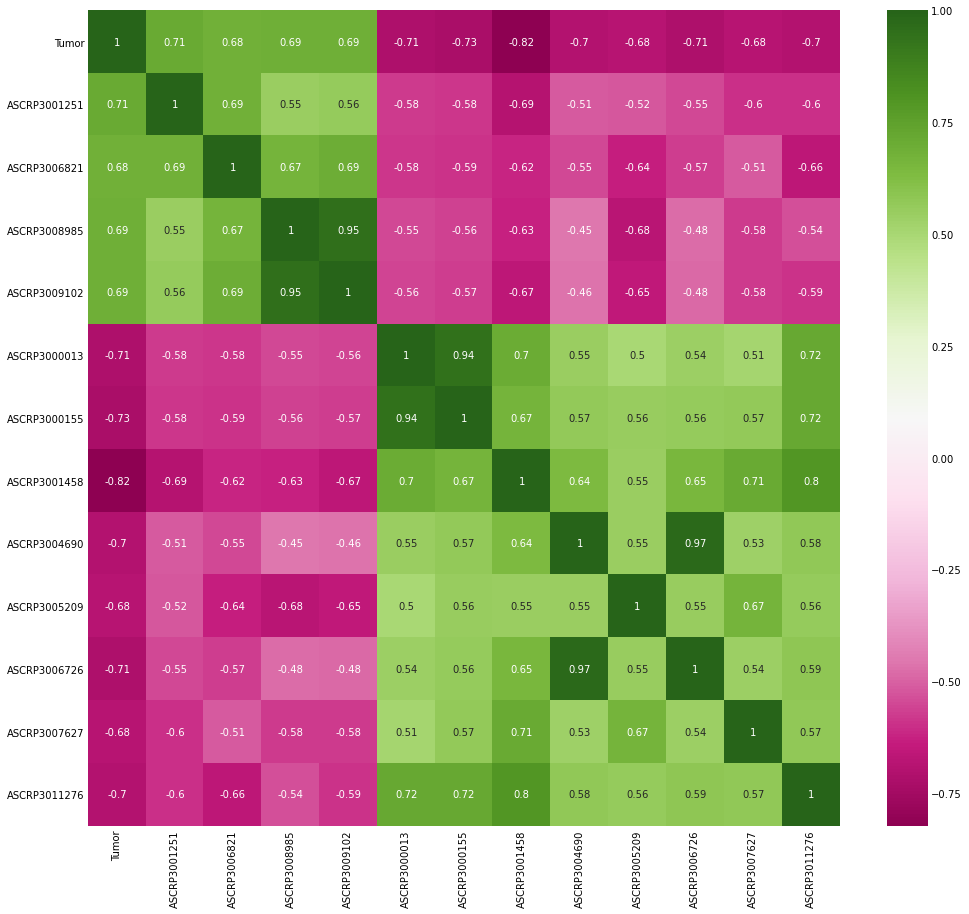

In [33]:
#heatmap shows circRNAs that are positvely correlated with tumor and those that are negatively correlated - up/down regulation
plt.figure(figsize=(15,15))
sns.heatmap(circ2.corr(),annot=True,cmap='PiYG')
plt.show()
#also show the circs correlated wtih each other are from the same gene graph

In [20]:
circ2.to_csv('circ2.csv')

Text(0.5, 0, 'Tumor')

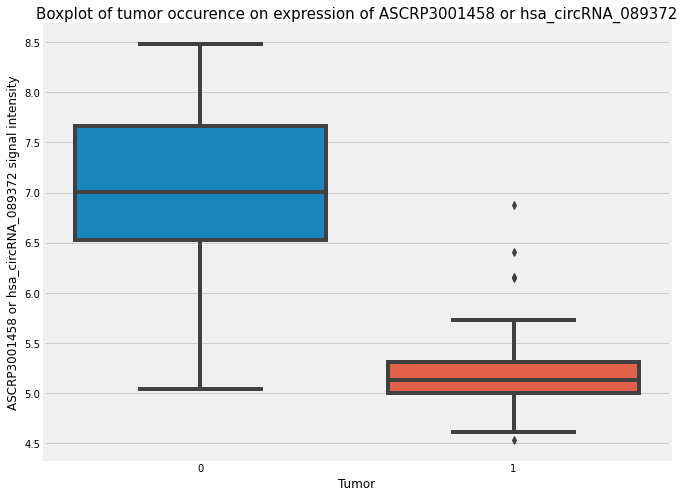

In [7]:
plt.figure(figsize=(10,8))

plt.title('Boxplot of tumor occurence on expression of ASCRP3001458 or hsa_circRNA_089372', fontsize = 15)
sns.boxplot(x="Tumor", y="ASCRP3001458", data=circ2)
plt.ylabel('ASCRP3001458 or hsa_circRNA_089372 signal intensity', fontsize=12)
plt.xlabel('Tumor', fontsize=12)

Text(0.5, 0, 'Tumor')

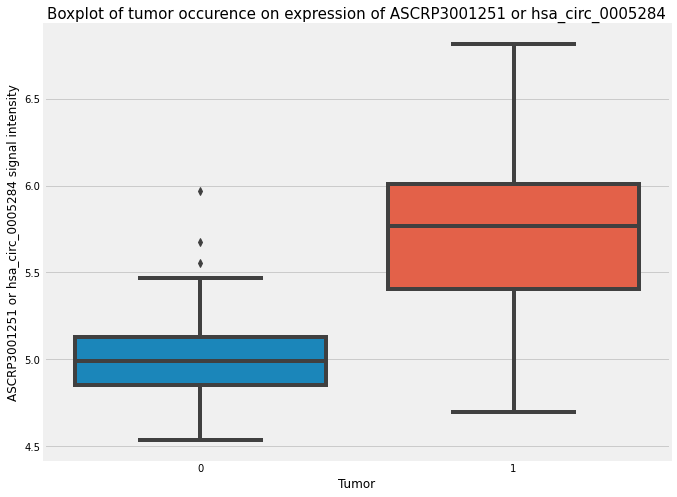

In [8]:
plt.figure(figsize=(10,8))

plt.title('Boxplot of tumor occurence on expression of ASCRP3001251 or hsa_circ_0005284', fontsize = 15)
sns.boxplot(x="Tumor", y="ASCRP3001251", data=circ2)
plt.ylabel('ASCRP3001251 or hsa_circ_0005284 signal intensity', fontsize=12)
plt.xlabel('Tumor', fontsize=12)

Text(0.5, 0, 'Tumor')

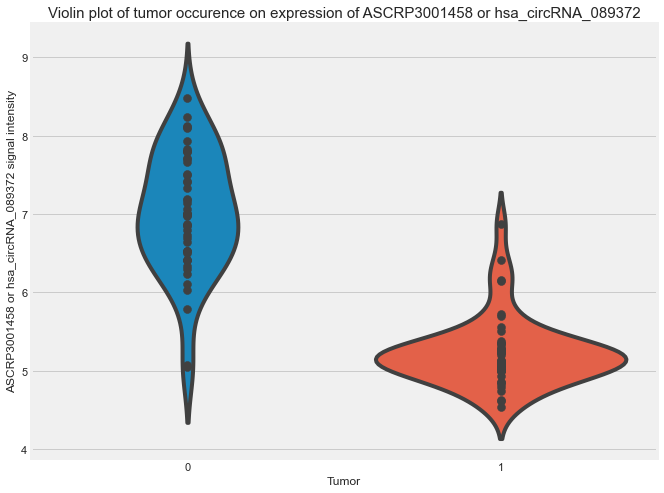

In [74]:
plt.figure(figsize=(10,8))

plt.title('Violin plot of tumor occurence on expression of ASCRP3001458 or hsa_circRNA_089372', fontsize = 15)
sns.violinplot(x="Tumor", y="ASCRP3001458", data=circ2, inner = "points")
plt.ylabel('ASCRP3001458 or hsa_circRNA_089372 signal intensity', fontsize=12)
plt.xlabel('Tumor', fontsize=12)

Text(0.5, 0, 'Tumor')

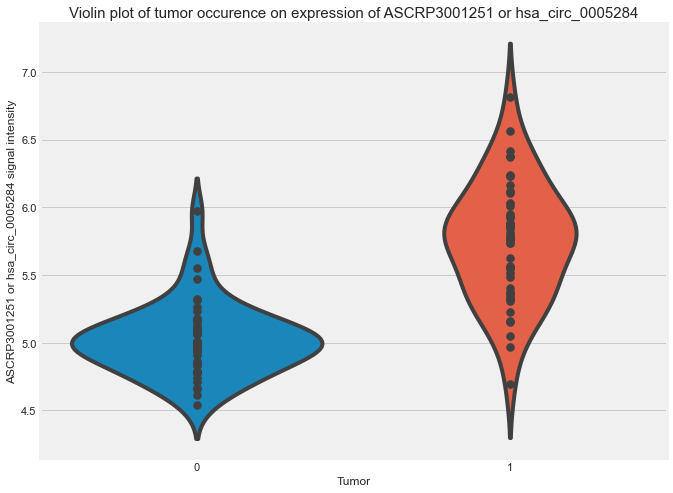

In [72]:
plt.figure(figsize=(10,8))

plt.title('Violin plot of tumor occurence on expression of ASCRP3001251 or hsa_circ_0005284', fontsize = 15)
sns.violinplot(x="Tumor", y="ASCRP3001251", data=circ2, inner = "points")
plt.ylabel('ASCRP3001251 or hsa_circ_0005284 signal intensity', fontsize=12)
plt.xlabel('Tumor', fontsize=12)

/Users/kbhaskar/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 23.799999999999983, 'ASCRP3001458 or hsa_circRNA_089372 signal intensity')

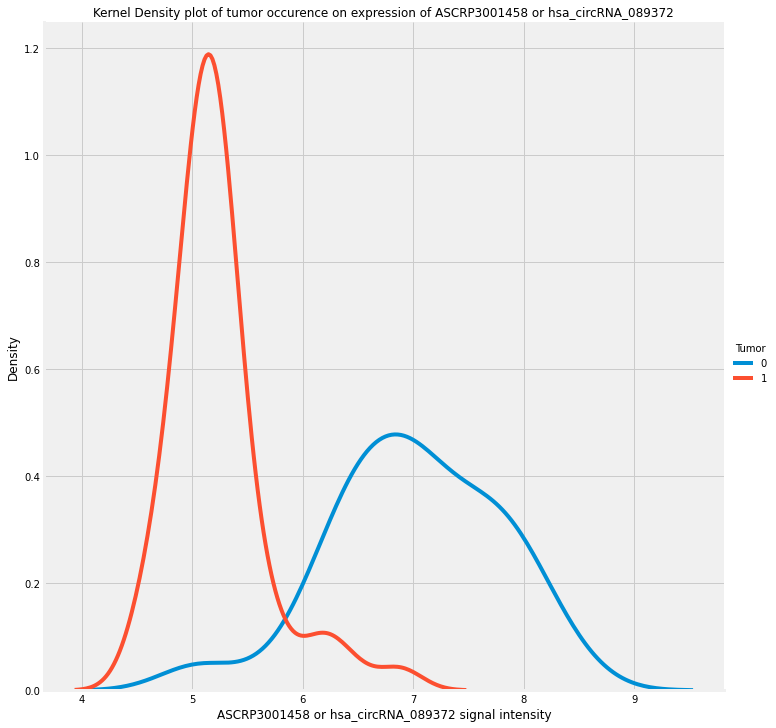

In [15]:

sns.FacetGrid(circ2, hue="Tumor", size=10) \
   .map(sns.kdeplot, "ASCRP3001458") \
   .add_legend()
plt.title('Kernel Density plot of tumor occurence on expression of ASCRP3001458 or hsa_circRNA_089372', fontsize = 12)
plt.ylabel('Density', fontsize=12)
plt.xlabel('ASCRP3001458 or hsa_circRNA_089372 signal intensity', fontsize=12)

/Users/kbhaskar/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 23.799999999999983, 'ASCRP3001251 or hsa_circ_0005284 signal intensity')

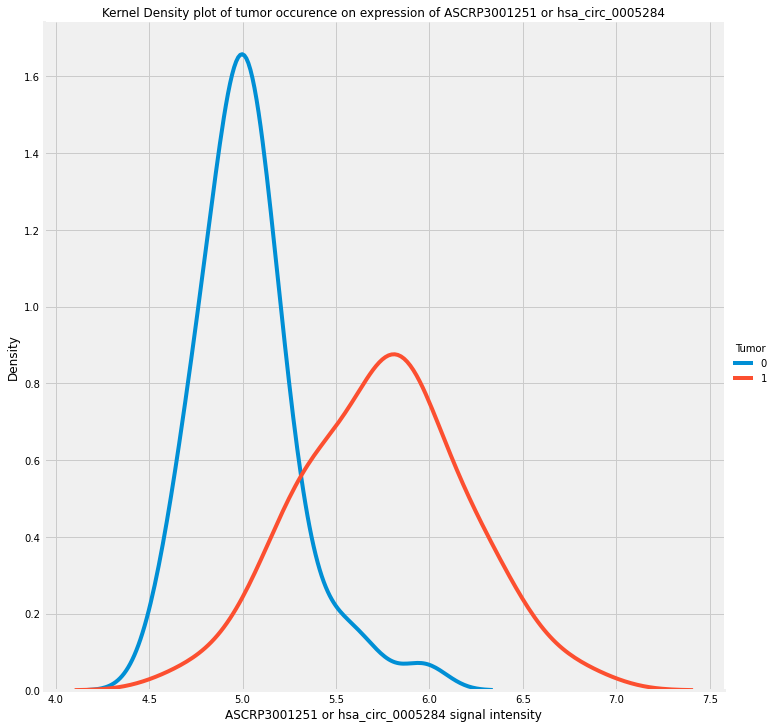

In [16]:

sns.FacetGrid(circ2, hue="Tumor", size=10) \
   .map(sns.kdeplot, "ASCRP3001251") \
   .add_legend()
plt.title('Kernel Density plot of tumor occurence on expression of ASCRP3001251 or hsa_circ_0005284', fontsize = 12)
plt.ylabel('Density', fontsize=12)
plt.xlabel('ASCRP3001251 or hsa_circ_0005284 signal intensity', fontsize=12)

/Users/kbhaskar/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


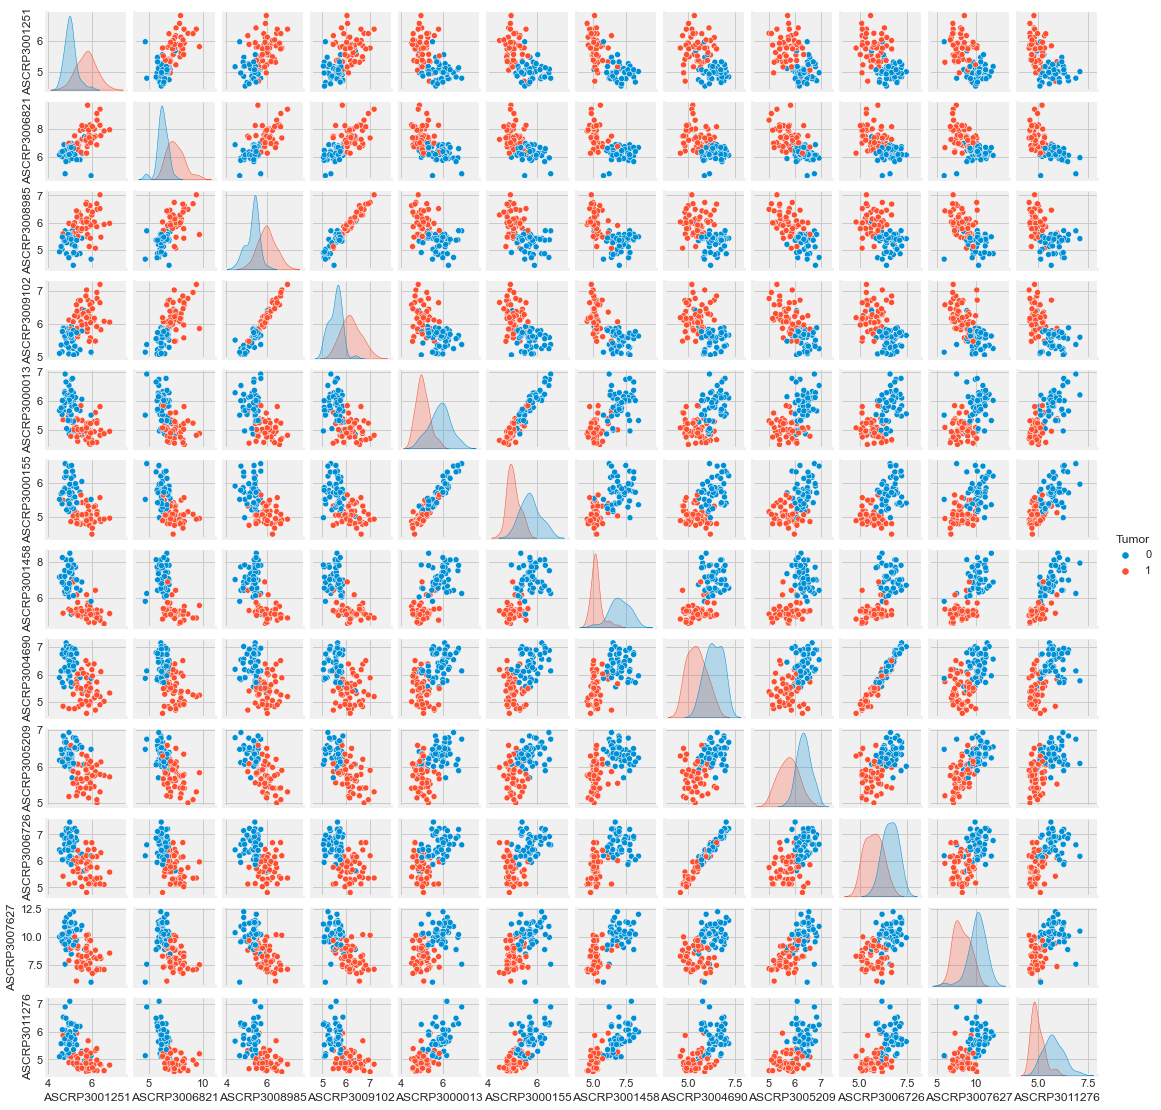

In [76]:
sns.pairplot(circ2,hue = 'Tumor',size=1.3)

#sns.set(font_scale=1)


array([[<AxesSubplot:title={'center':'ASCRP3000013'}, xlabel='[Tumor]'>,
        <AxesSubplot:title={'center':'ASCRP3000155'}, xlabel='[Tumor]'>,
        <AxesSubplot:title={'center':'ASCRP3001251'}, xlabel='[Tumor]'>],
       [<AxesSubplot:title={'center':'ASCRP3001458'}, xlabel='[Tumor]'>,
        <AxesSubplot:title={'center':'ASCRP3004690'}, xlabel='[Tumor]'>,
        <AxesSubplot:title={'center':'ASCRP3005209'}, xlabel='[Tumor]'>],
       [<AxesSubplot:title={'center':'ASCRP3006726'}, xlabel='[Tumor]'>,
        <AxesSubplot:title={'center':'ASCRP3006821'}, xlabel='[Tumor]'>,
        <AxesSubplot:title={'center':'ASCRP3007627'}, xlabel='[Tumor]'>],
       [<AxesSubplot:title={'center':'ASCRP3008985'}, xlabel='[Tumor]'>,
        <AxesSubplot:title={'center':'ASCRP3009102'}, xlabel='[Tumor]'>,
        <AxesSubplot:title={'center':'ASCRP3011276'}, xlabel='[Tumor]'>]],
      dtype=object)

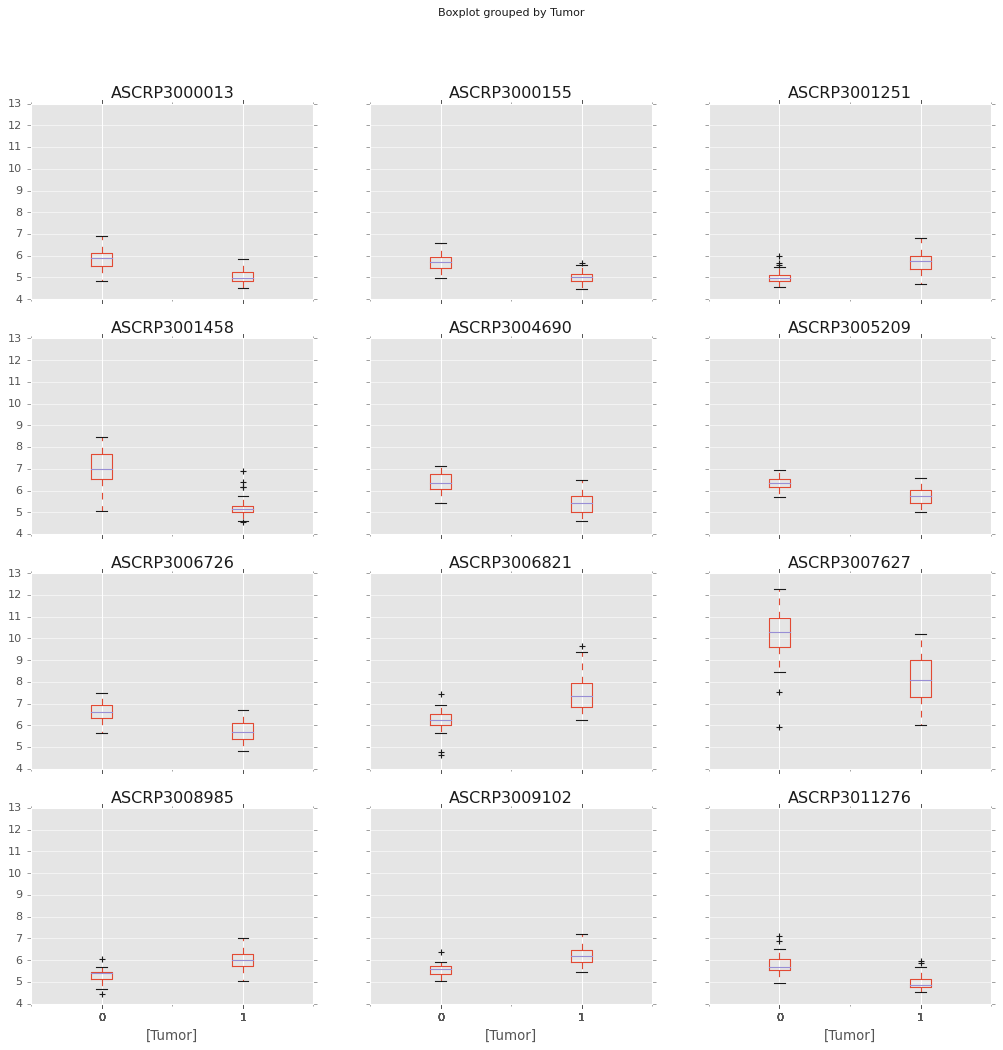

In [34]:
plt.style.use("ggplot")
circ2.boxplot(by="Tumor", figsize=(15, 15))

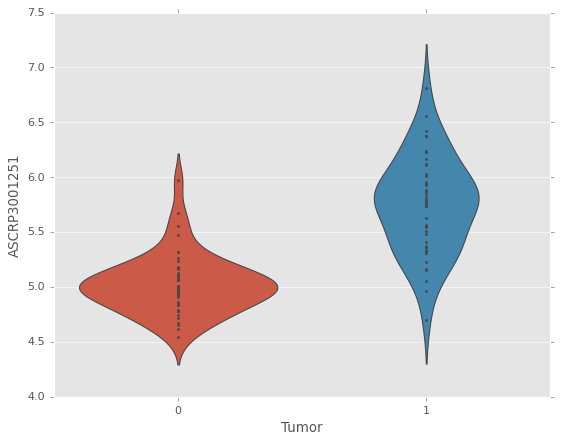

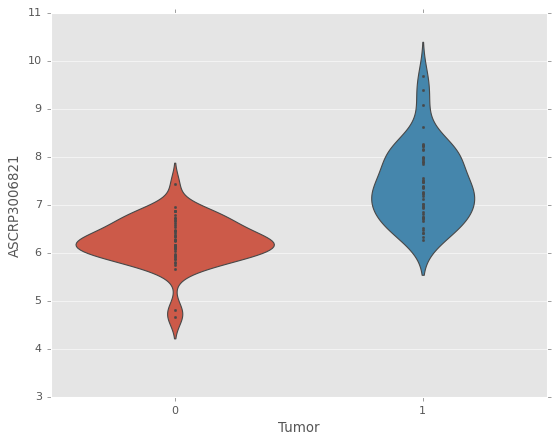

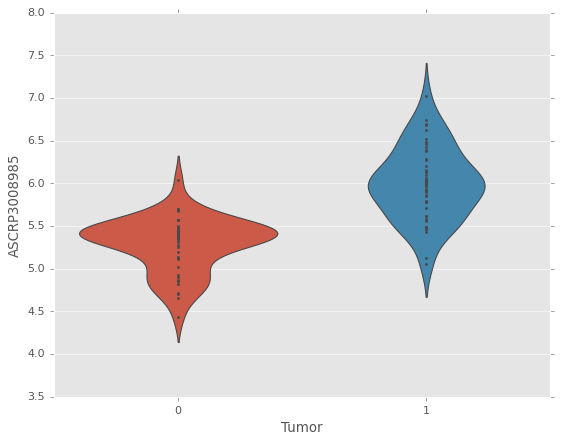

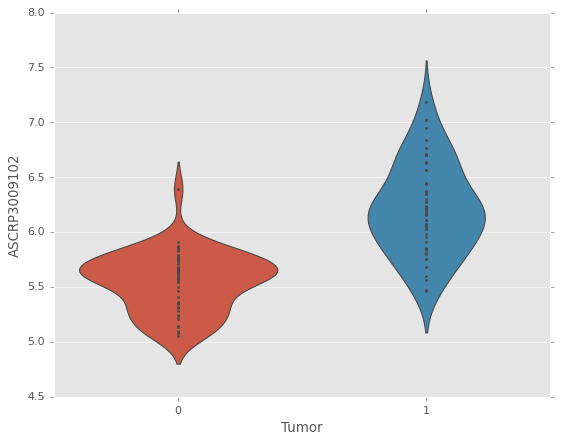

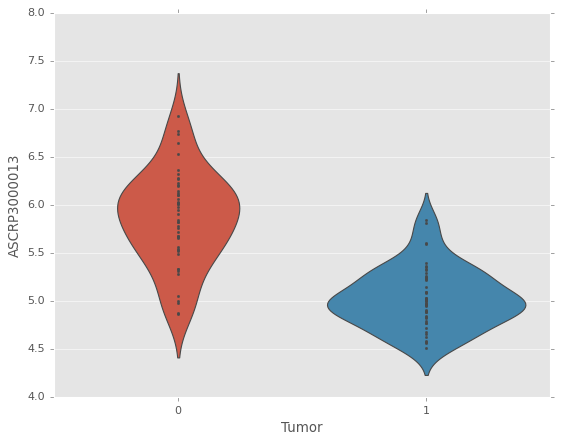

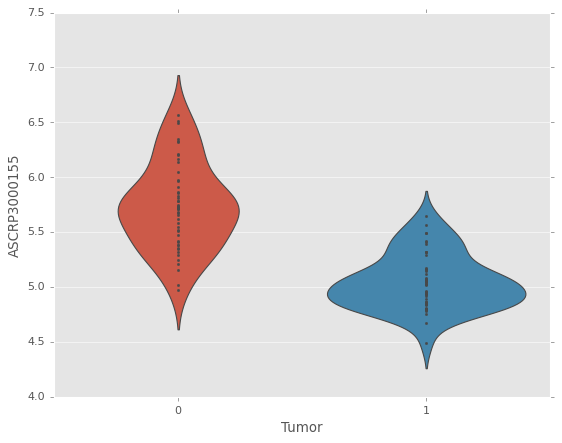

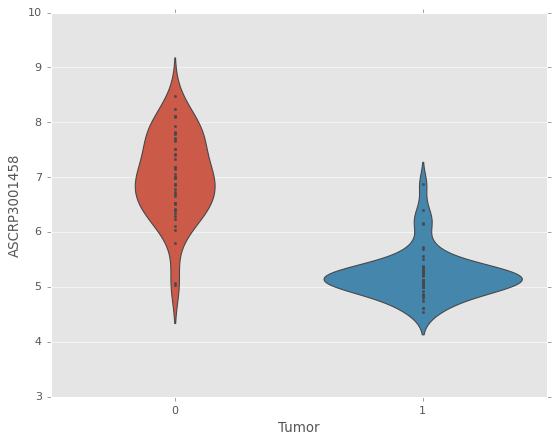

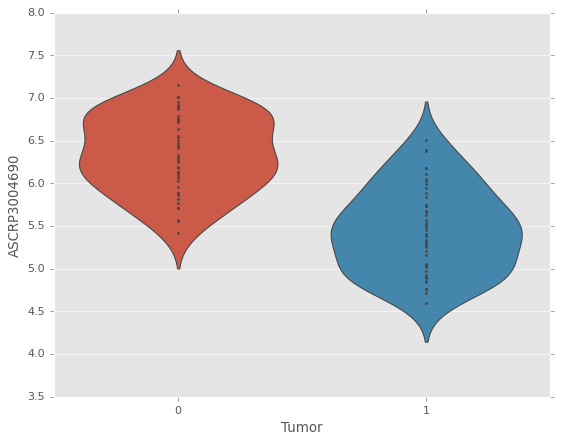

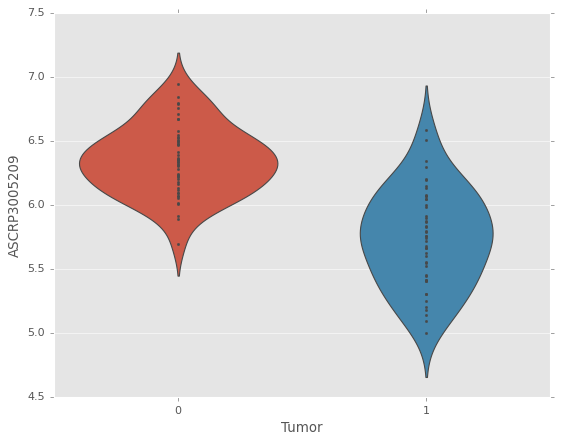

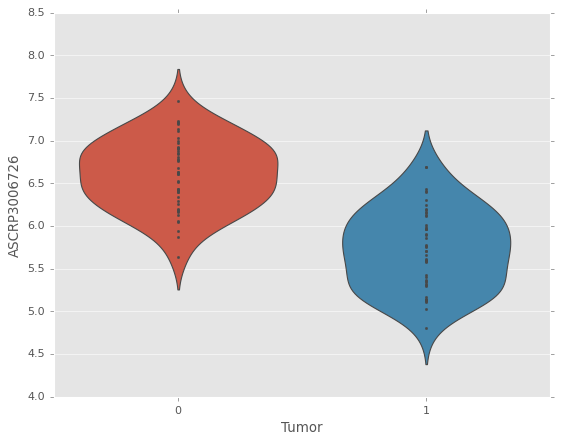

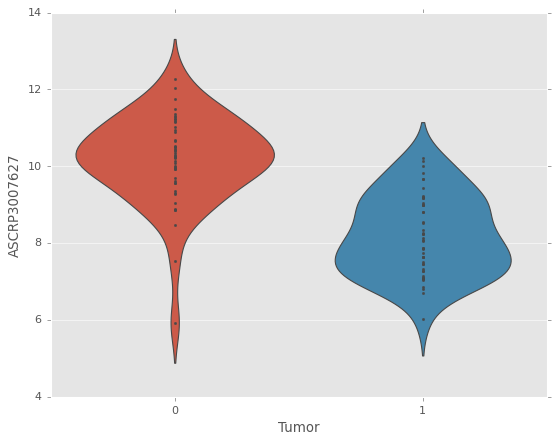

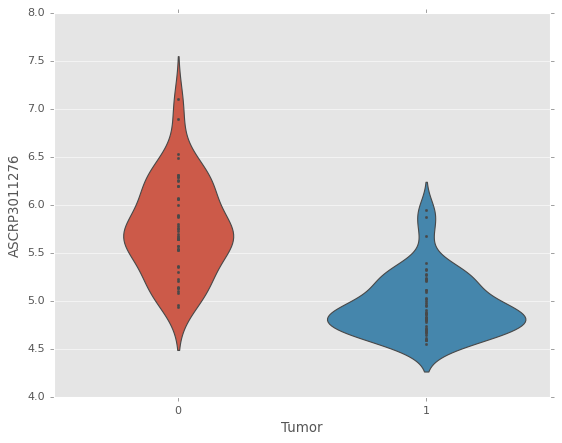

In [45]:
arr = circ2.columns
for count in range (1, len(arr)):
    plt.figure()
    sns.violinplot(x="Tumor", y=arr[count], data=circ2, inner = "points")

<AxesSubplot:title={'center':'Andrew Curve of tumor occurence on expression of 12 deregulated circRNAs'}>

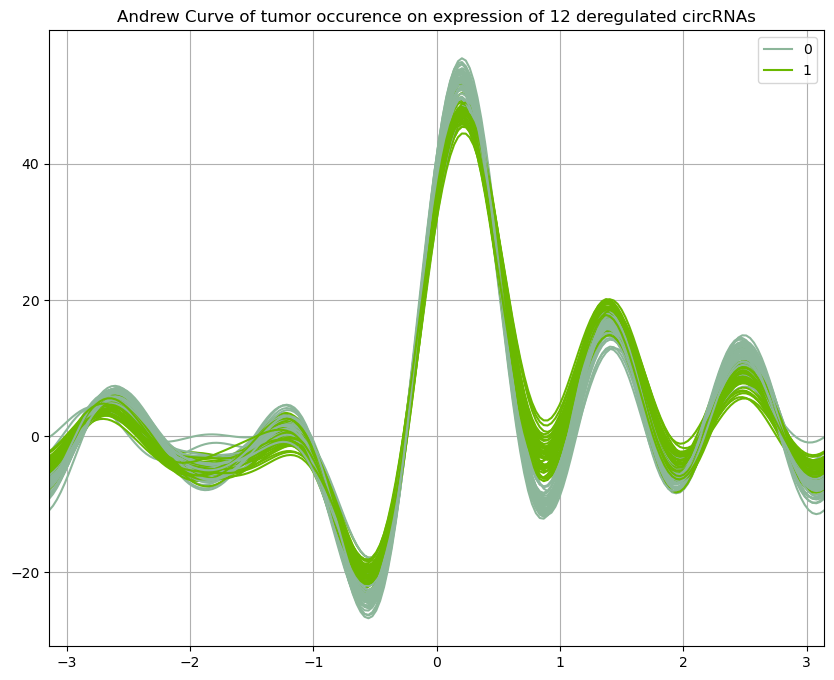

In [49]:
from pandas.plotting import andrews_curves
plt.style.use("default")
plt.figure(figsize=(10,8))
plt.title('Andrew Curve of tumor occurence on expression of 12 deregulated circRNAs', fontsize = 12)
andrews_curves(circ2, "Tumor")

<AxesSubplot:title={'center':'Parallel coordinate of  expression of 12 deregulated circRNAs on tumor occurence'}, ylabel='circRNA signal intenstiy'>

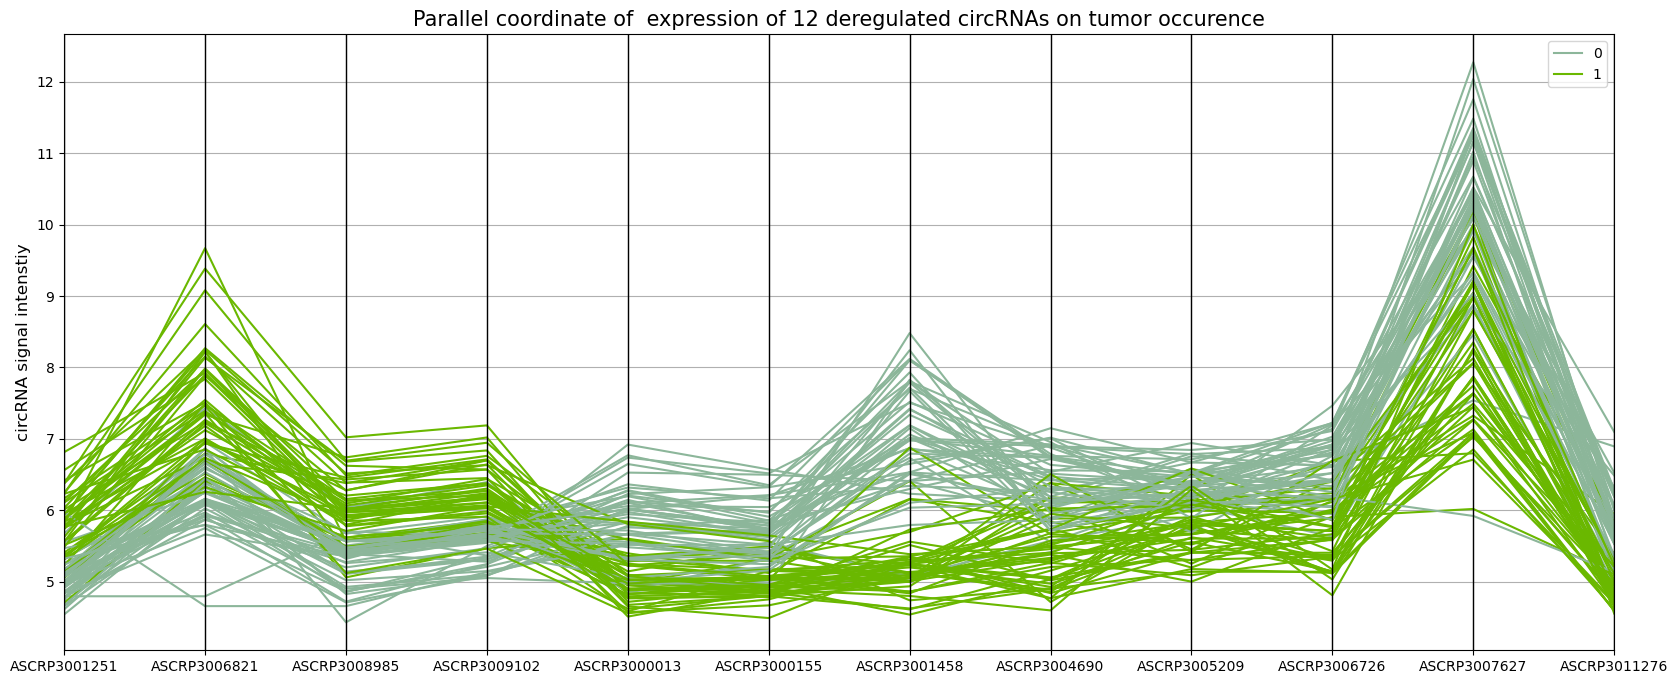

In [78]:

plt.style.use("default")
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(20,8))
plt.title('Parallel coordinate of  expression of 12 deregulated circRNAs on tumor occurence', fontsize = 15)
plt.ylabel('circRNA signal intenstiy', fontsize=12)
parallel_coordinates(circ2, "Tumor")
